In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Warehouse_and_Retail_Sales.csv")

In [3]:
df_cleaned = df.dropna(subset=['RETAIL SALES', 'ITEM TYPE', 'SUPPLIER'])
df_cleaned = df_cleaned[(df_cleaned['RETAIL SALES'] >= 0) & 
                        (df_cleaned['RETAIL TRANSFERS'] >= 0) & 
                        (df_cleaned['WAREHOUSE SALES'] >= 0)]
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['YEAR'].astype(str) + '-' + df_cleaned['MONTH'].astype(str) + '-01')

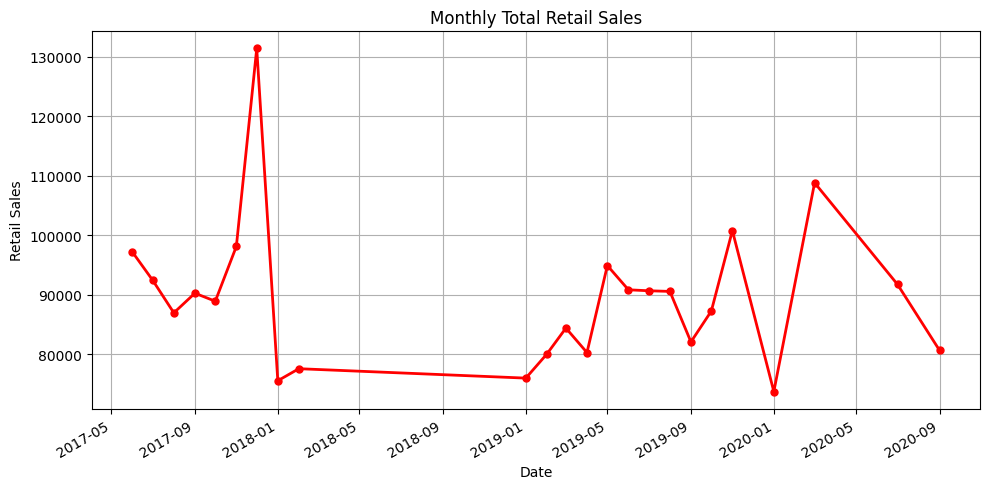

In [17]:
monthly_sales = df_cleaned.groupby('DATE')['RETAIL SALES'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot( kind='line', marker='o', color='red', linewidth=2, markersize=5)
plt.title("Monthly Total Retail Sales")
plt.xlabel("Date")
plt.ylabel("Retail Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

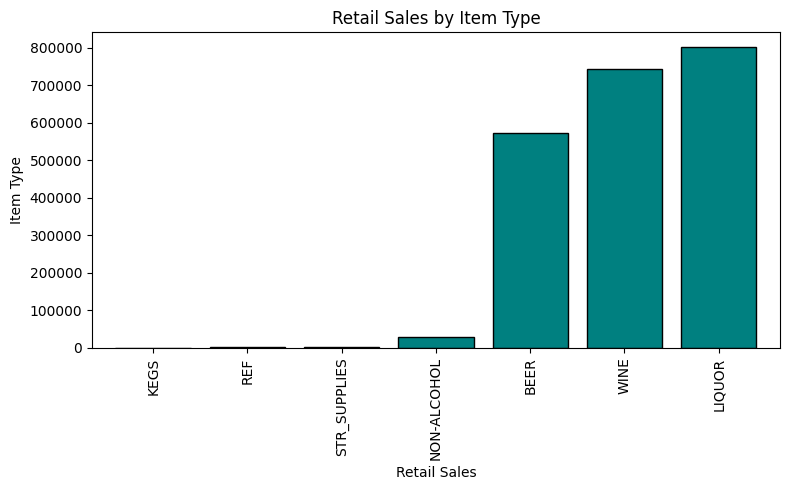

In [11]:
item_type_sales = df_cleaned.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values()
plt.figure(figsize=(8, 5))
item_type_sales.plot(kind='bar', color='teal', edgecolor='black', width=0.8)
plt.title("Retail Sales by Item Type")
plt.xlabel("Retail Sales")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()

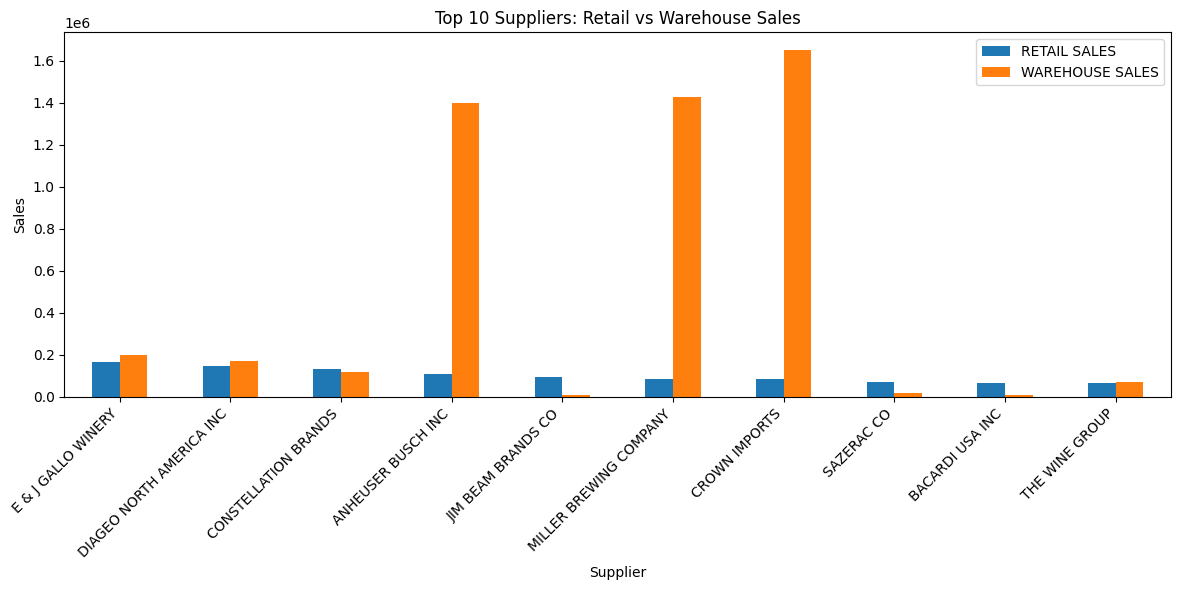

In [6]:
supplier_summary = df_cleaned.groupby('SUPPLIER')[['RETAIL SALES', 'WAREHOUSE SALES']].sum()
top_suppliers = supplier_summary.nlargest(10, 'RETAIL SALES')
top_suppliers.plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Suppliers: Retail vs Warehouse Sales")
plt.xlabel("Supplier")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

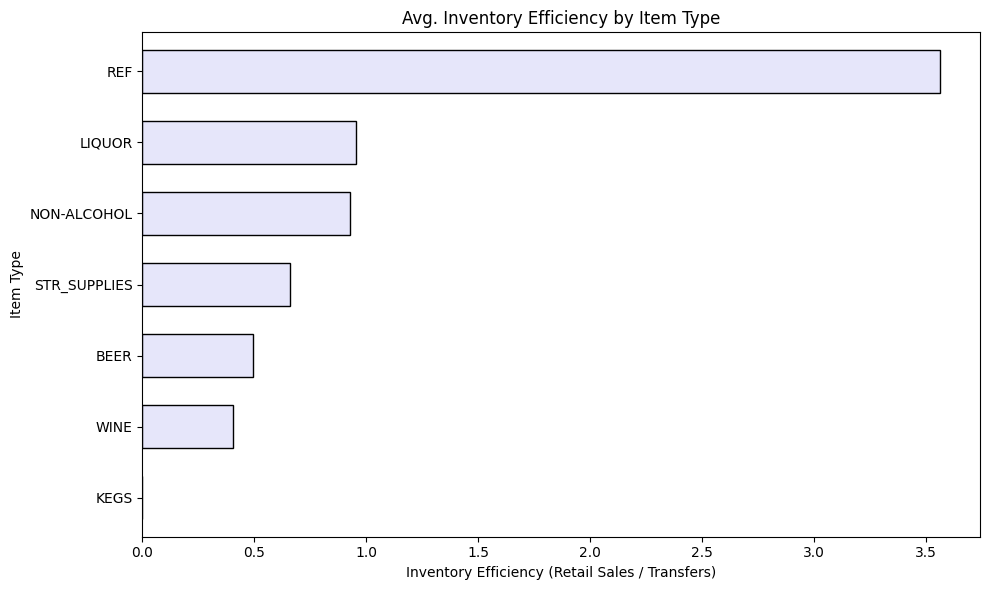

In [15]:
df_cleaned['INVENTORY_EFFICIENCY'] = df_cleaned['RETAIL SALES'] / (df_cleaned['RETAIL TRANSFERS'] + 1)
efficiency_summary = df_cleaned.groupby('ITEM TYPE')['INVENTORY_EFFICIENCY'].mean().sort_values()
plt.figure(figsize=(10, 6))
efficiency_summary.plot(kind='barh', color='lavender', edgecolor='black', width=0.6)
plt.title("Avg. Inventory Efficiency by Item Type")
plt.xlabel("Inventory Efficiency (Retail Sales / Transfers)")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()